# Checking Your Jupyter Notebook Environment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
import platform 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# run the following if it is the first time
try:
    import plotly
except:
    os.system("pip install plotly")

In [4]:
try:
    import tensorflow
except:
    os.system("pip install tensorflow")

In [5]:
try:
    import keras
except:
    os.system("pip install keras")

In [6]:
import keras
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go

In [7]:
print(sys.executable)
print(platform.python_version())
print(pd.__version__)
print(np.__version__)
print(plotly.__version__)
print(keras.__version__)
print(tensorflow.__version__)

/Users/jihyelee/.pyenv/versions/3.9.12/bin/python3
3.9.12
2.1.1
1.26.0
5.20.0
2.14.0
2.14.0


# check datasets available

In [51]:
# Common datasets from seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**Iris Dataset is the "Hello World" dataset in Machine Learning**

In [52]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Testing ski-learn


**Build a Linear Regression**

### Testing Keras and TensorFlow

In [55]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [56]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
train_images.shape

(60000, 28, 28)

In [58]:
len(train_labels)

60000

In [59]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

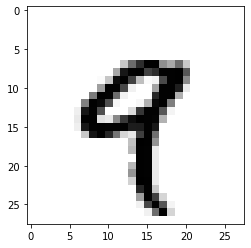

In [60]:
idx = 4
digit = train_images[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [61]:
train_labels[idx]

9

In [62]:
# define a neural network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [63]:
# compilation
network.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [64]:
# preparing the image data
train_images = train_images.reshape( (60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [65]:
# train
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4182 - accuracy: 0.8786
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0464 - accuracy: 0.9859
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0359 - accuracy: 0.9893


In [66]:
# evaluation
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9809
test_acc: 0.98089998960495


In [67]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('train_acc:', train_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9935
train_acc: 0.9934666752815247
